In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Eğitim klasörünün yolu 
train_dir = "C:/Users/PC/Desktop/train"


X = []
y = []

# Tüm görselleri oku
for img_name in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_name)
    
    # Etiket belirleme
    if "cat" in img_name:
        label = 0
    elif "dog" in img_name:
        label = 1
    else:
        continue   #Bilinmeyen isimler varsa atlar
    # Görseli oku ve işle 
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (64, 64))
    img_flat = img.flatten()
    
    X.append(img_flat)
    y.append(label)

# Numpy dizisine dönüştür
X = np.array(X)
y = np.array(y)

print("Veri Boyutu:", X.shape)
print("Veri Boyutu:", y.shape)

    

Veri Boyutu: (25000, 4096)
Veri Boyutu: (25000,)


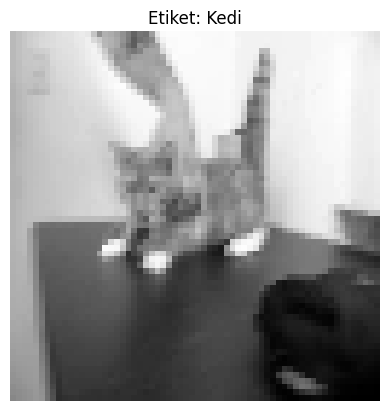

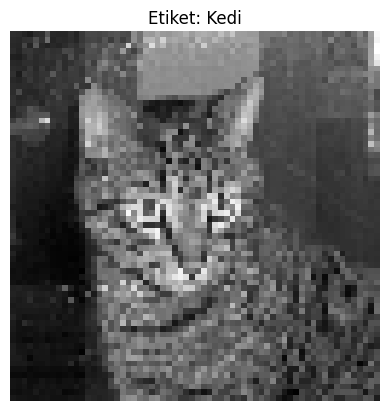

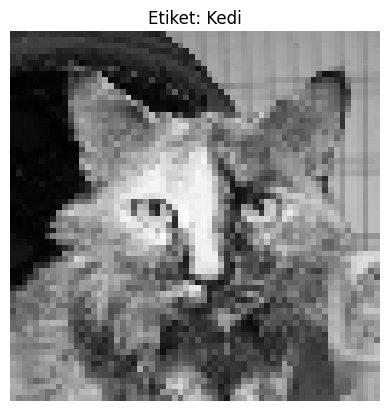

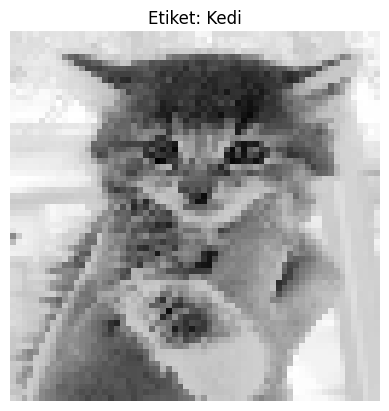

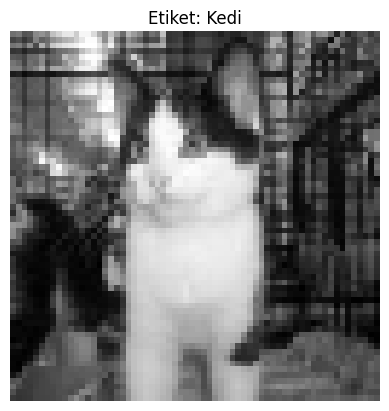

In [6]:
# İlk 5 resmi ve etiketini gösterme
for i in range(5):
    plt.imshow(X[i].reshape(64, 64), cmap = "gray")
    plt.title("Etiket: " + ("Kedi" if y[i] == 0 else "Köpek"))
    plt.axis("off")
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)


Eğitim veri boyutu: (20000, 4096)
Test veri boyutu: (5000, 4096)


In [9]:
model = LinearSVC(dual = False)
model.fit(X_train, y_train)

LinearSVC(dual=False)

In [10]:
import joblib
joblib.dump(model, "svm_model.pkl")

['svm_model.pkl']

In [ ]:
# Modeli tekrar eğitmeden buradan kullanmak
model = joblib.load("svm_model.pkl")

In [13]:
y_pred = model.predict(X_test)

#Doğruluk Oranı
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk: {:.2f}%".format(accuracy * 100))

#Sınıflandırma Raporu
print(classification_report(y_test, y_pred, target_names=["Kedi", "Köpek"]))

#Karışıklık matrisi Confusion Matrix
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))



Doğruluk: 52.06%
              precision    recall  f1-score   support

        Kedi       0.52      0.54      0.53      2515
       Köpek       0.52      0.50      0.51      2485

    accuracy                           0.52      5000
   macro avg       0.52      0.52      0.52      5000
weighted avg       0.52      0.52      0.52      5000

Karışıklık Matrisi:
 [[1361 1154]
 [1243 1242]]


2

In [1]:
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

#### include_top = False: Üstteki sınıflandırma katmanını kaldırıyoruz.
#### pooling = "avg": Global avarage pooling ile çıktı vektörüne 2048 boyutunda tek vektöre indiriyoruz.

In [2]:
model = ResNet50(weights = "imagenet", include_top = False, pooling = "avg", input_shape = (224, 224, 3))

resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

In [3]:
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose = 0)
    features = features.flatten()
    return features / np.linalg.norm(features)


In [ ]:
train_dir = "C:/Users/PC/Desktop/train"

all_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(".jpg")]

features = []
labels = []

for img_path in all_files:
    filename = os.path.basename(img_path)
    label = "cat" if "cat" in filename else "dog"
    
    features.append(extract_features(img_path))
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [ ]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)


In [ ]:
y_pred = svm_clf.predict(X_test)

print("Doğruluk: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))


In [ ]:
test_dir = 'test'  # test klasörünün tam yolu
test_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.jpg')]

test_features = []
test_ids = []

for img_path in test_files:
    img_id = os.path.basename(img_path)  # örn: '12345.jpg'
    img_id = os.path.splitext(img_id)[0]  # sadece '12345' kısmı
    
    test_ids.append(img_id)
    test_features.append(extract_features(img_path))

test_features = np.array(test_features)


In [ ]:
y_pred = model.predict(test_features)


In [1]:
"""
import pandas as pd

submission = pd.read_csv('sampleSubmission.csv')
submission['label'] = y_pred  # modelin tahminleri
submission.to_csv('my_submission.csv', index=False)
"""



FileNotFoundError: [Errno 2] No such file or directory: 'sampleSubmission.csv'

In [1]:
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib



In [2]:
# MobileNetV2 modelini yükle (ImageNet ağırlıklarıyla, üst katmanı dahil etme, global average pooling ile)
model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))



In [3]:
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # MobileNetV2’ye özel preprocess
    features = model.predict(img_array, verbose=0)
    features = features.flatten()
    return features / np.linalg.norm(features)



In [4]:
train_dir = "C:/Users/PC/Desktop/train"
all_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(".jpg")]

features = []
labels = []

for img_path in all_files:
    filename = os.path.basename(img_path)
    label = "cat" if "cat" in filename else "dog"
    
    features.append(extract_features(img_path))
    labels.append(label)

features = np.array(features)
labels = np.array(labels)




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)